In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import re
import traceback

from pathlib import Path

import wheel_movie as wm
from importlib import reload


pd.set_option("display.max_columns", None)



dirsize = lambda directory: sum(f.stat().st_size for f in directory.glob('**/*') if f.is_file())

In [8]:
reload(wm)


def make_movie(data_folder, re_run=False, **kwargs):
    experiment_number = re.findall(r"nt_(\d+)", str(data_folder))[0]
    output_movie = data_folder / "movies" / f"{data_folder.name}.mp4"
    if output_movie.exists() and not re_run:
        print(f"Movie already exists for {data_folder.name}")
        return
    movie_kwargs = dict(
        plot_width="30s",
        output_path=data_folder / "movies",
        output_filename=data_folder.name,
        show_nth_frame=3,
        fps=20,
        zero_pos_frac=0.65,
        n_chunks=500,
        n_jobs=6,
        delete_chunks=False,
    )
    movie_kwargs.update(kwargs)
    try:
        movie = wm.WheelMovie(
            wheel_data_file=list(data_folder.glob("*tracker.csv"))[0],
            movie_file=list(data_folder.glob("*.avi"))[0],
            movie_timestamp_file=list(data_folder.glob("*timestamps.csv"))[0],
            fly_name=f"Fly {experiment_number}",
            **movie_kwargs,
        )

        movie.make_movie_parallel()
    except:
        print(f"Failed to make movie for {data_folder.name}")
        print(traceback.format_exc())
    finally:
        return movie


data_folder = Path("data/2023_07_14")
folder = data_folder / "rig1_experiment_02"


# movie = make_movie(data_folder / 'rig1_experiment_08')

In [ ]:
3

In [ ]:
data_folder = Path("data/2023_07_12")


for folder in data_folder.iterdir():
    if dirsize(folder) < 1e8:
        print(f"Skipping {folder.name}, only {dirsize(folder) / 1e9 :.3f} GB")
        continue
    print(f'Processing {folder.name}')
    make_movie(folder, re_run=False, n_chunks=1000, n_jobs=8, total_frames=100000,
                burn_frame_number=True, burn_timestamp=True, overwrite_chunks=False)

In [14]:
data_folder = Path("data/2023_07_13")


for folder in data_folder.iterdir():
    if dirsize(folder) < 1e8:
        print(f"Skipping {folder.name}, only {dirsize(folder) / 1e9 :.3f} GB")
        continue
    print(f'Processing {folder.name}')
    make_movie(folder, re_run=False, n_chunks=1000, n_jobs=8, total_frames=100000,
                burn_frame_number=True, burn_timestamp=True, overwrite_chunks=False)

Processing rig1_experiment_07
Movie already exists for rig1_experiment_07
Processing rig1_experiment_06
Movie already exists for rig1_experiment_06
Processing rig1_experiment_12
Movie already exists for rig1_experiment_12
Processing rig1_experiment_01
Movie already exists for rig1_experiment_01
Processing rig1_experiment_02
Movie already exists for rig1_experiment_02
Processing rig1_experiment_10
Movie already exists for rig1_experiment_10
Processing rig1_experiment_11
Movie already exists for rig1_experiment_11
Processing rig1_experiment_09
Movie already exists for rig1_experiment_09
Processing rig1_experiment_04
Movie already exists for rig1_experiment_04
Processing rig1_experiment_03
Movie already exists for rig1_experiment_03
Processing rig1_experiment_08
Movie already exists for rig1_experiment_08
Processing rig1_experiment_05
Movie already exists for rig1_experiment_05


Processing rig1_experiment_07
Movie already exists for rig1_experiment_07
Processing rig1_experiment_06
Movie already exists for rig1_experiment_06
Processing rig1_experiment_01
Movie already exists for rig1_experiment_01
Processing rig1_experiment_02


100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s] 
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-

total time: 652.4219191074371
Processing rig1_experiment_10
Movie already exists for rig1_experiment_10
Processing rig1_experiment_09
Movie already exists for rig1_experiment_09
Processing rig1_experiment_04
Movie already exists for rig1_experiment_04
Processing rig1_experiment_03
Movie already exists for rig1_experiment_03
Processing rig1_experiment_08
Movie already exists for rig1_experiment_08
Processing rig1_experiment_05
Movie already exists for rig1_experiment_05


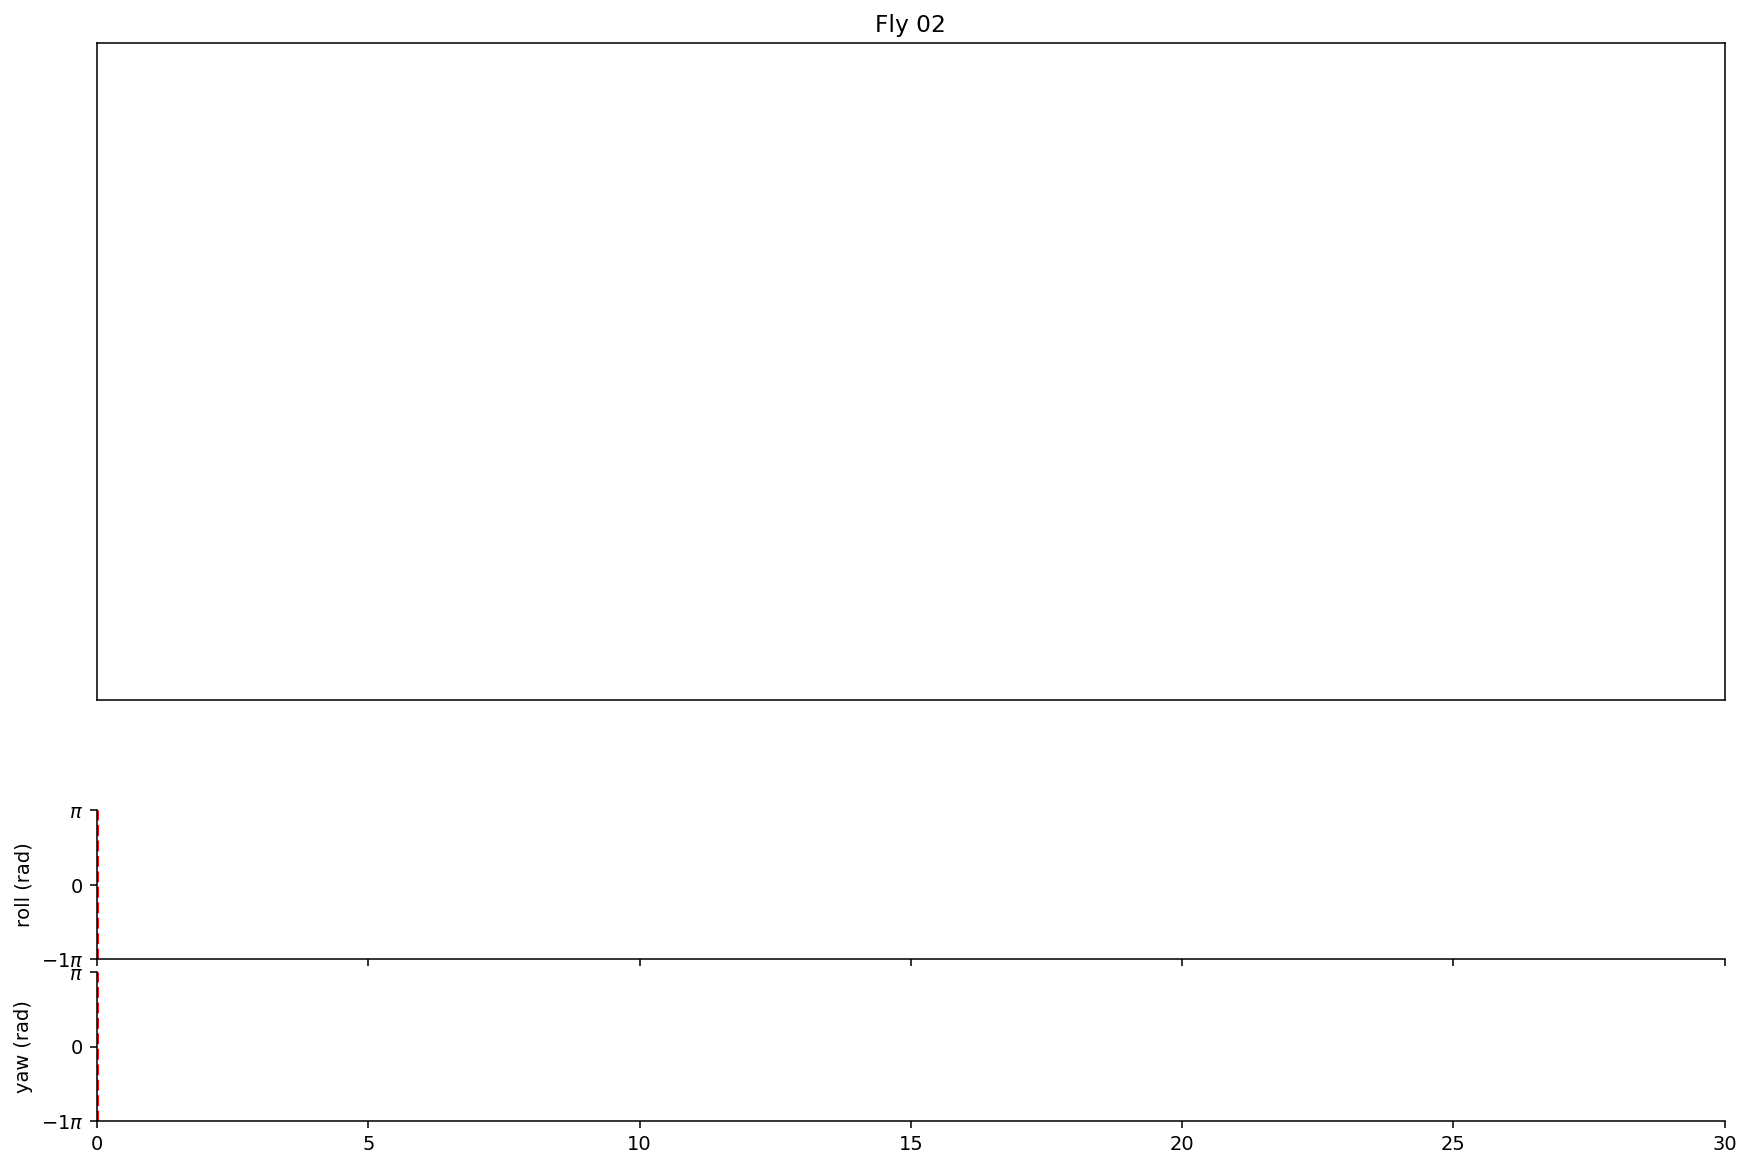

In [21]:
data_folder = Path("data/2023_07_14")


for folder in data_folder.iterdir():
    if dirsize(folder) < 1e8:
        print(f"Skipping {folder.name}, only {dirsize(folder) / 1e9 :.3f} GB")
        continue
    print(f'Processing {folder.name}')
    make_movie(folder, re_run=False, n_chunks=1000, n_jobs=8, total_frames=100000,
                burn_frame_number=True, burn_timestamp=True, overwrite_chunks=False)

In [22]:


data_folder = Path("data")
output_dir = data_folder/'final_movies'
if not output_dir.exists():
    output_dir.mkdir()

copy=True
overwrite=False

for date_folder in data_folder.iterdir():
    if not date_folder.is_dir() or 'final' in  date_folder.name:
        continue
    for fly_folder in date_folder.iterdir():
        final_movie = fly_folder / f'movies/{fly_folder.name}.mp4'
        combined_name = f'{date_folder.name}_{fly_folder.name}.mp4'
        if final_movie.exists():
            print(f'{combined_name} Done')
            pass
        else:
            print(f'{combined_name}, {dirsize(fly_folder )/ 1e9:0.3f} GB')
        # print(f'{combined_name} is finished? {final_movie.exists()}')
        

2023_07_14_rig1_experiment_07.mp4 Done
2023_07_14_rig1_experiment_06.mp4 Done
2023_07_14_rig1_experiment_01.mp4 Done
2023_07_14_rig1_experiment_02.mp4 Done
2023_07_14_rig1_experiment_10.mp4 Done
2023_07_14_rig1_experiment_09.mp4 Done
2023_07_14_rig1_experiment_04.mp4 Done
2023_07_14_rig1_experiment_03.mp4 Done
2023_07_14_rig1_experiment_08.mp4 Done
2023_07_14_rig1_experiment_05.mp4 Done
2023_07_12_rig1_experiment_07.mp4 Done
2023_07_12_rig1_experiment_06.mp4 Done
2023_07_12_rig1_experiment_12.mp4 Done
2023_07_12_rig1_experiment_13.mp4 Done
2023_07_12_rig1_experiment_01.mp4 Done
2023_07_12_rig1_experiment_02.mp4 Done
2023_07_12_rig1_experiment_10.mp4, 0.023 GB
2023_07_12_rig1_experiment_11.mp4 Done
2023_07_12_rig1_experiment_19.mp4 Done
2023_07_12_rig1_experiment_09.mp4, 0.052 GB
2023_07_12_rig1_experiment_15.mp4 Done
2023_07_12_rig1_experiment_17.mp4 Done
2023_07_12_rig1_experiment_16.mp4 Done
2023_07_12_rig1_experiment_18.mp4 Done
2023_07_12_rig1_experiment_04.mp4 Done
2023_07_12_rig1

In [ ]:
pd.__version__


In [ ]:
pd.Timedelta('30s').total_seconds()

In [ ]:
top_folders = [
    data_folder]
# [
#     data_folder / "highest_priority",
#     data_folder / "splitgal4_shib",
#     data_folder / "2023_07_11",
#     data_folder / "2023_07_12",
# ]
movie_list = []
for folder in top_folders:
    print(f"starting {folder}")
    for subfolder in folder.iterdir():
        print(f"starting {subfolder}")
        try:
            movie = make_movie(
                Path("data") / "correct_gain/rig1_experiment_09",
                # total_frames=500,
                n_chunks=500,
                # n_chunks=1000,
                burn_frame_number=True,
                burn_timestamp=True,
                re_run=True,
                overwrite_chunks=True,
                # end_time=pd.Timestamp("2023-07-13 21:43:37.601077760-0400", tz="US/Eastern"),
            )
        except :
            print(f"Failed to make movie for {subfolder.name}")
            print(traceback.format_exc())